##### On bike rental dataset

Do:
 
Descriptive statistics

Handle missing values

If error like ? in this data handle those values

Check distributions numerical and categorical data

Correlation matrix and Draw heatmap and write down the insights

If you hypothesis testing

encode ( one hot or label )

Scaling standard normalization

Split data , Train Linear Regression , Polynomial Regression , Lasso and Ridge Best alpha for lasso and ridge , r2 score , MSE , RMSE , MAE

For train and test both r2 score , mse , rmse , mae

In [4]:
# Descriptive Statistics

import pandas as pd
import numpy as np
df = pd.read_csv(r"C:\Users\sushm\Downloads\Bike_Rental_data(in).csv")


df.shape
df.info()
df.describe(include="all")


C:\Users\sushm\AppData\Local\Temp\ipykernel_8660\1145888418.py:5: DtypeWarning: Columns (3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"C:\Users\sushm\Downloads\Bike_Rental_data(in).csv")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100576 entries, 0 to 100575
Data columns (total 17 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   instant     100576 non-null  float64
 1   dteday      100576 non-null  object 
 2   season      100576 non-null  object 
 3   yr          100576 non-null  object 
 4   mnth        100576 non-null  object 
 5   hr          100576 non-null  float64
 6   holiday     100576 non-null  object 
 7   weekday     100576 non-null  float64
 8   workingday  100576 non-null  object 
 9   weathersit  100576 non-null  object 
 10  temp        100576 non-null  object 
 11  atemp       100576 non-null  object 
 12  hum         100576 non-null  object 
 13  windspeed   100576 non-null  object 
 14  casual      100576 non-null  object 
 15  registered  100576 non-null  object 
 16  cnt         100576 non-null  float64
dtypes: float64(4), object(13)
memory usage: 13.0+ MB


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,100576.000000,100576,100576,100576,100576,100576.000000,100576,100576.000000,100576,100576,100576,100576,100576,100576,100576,100576,100576.000000
unique,NaN,731,5,5,25,NaN,3,NaN,3,5,51,66,90,31,323,777,NaN
top,NaN,29-07-2011,fall,2012,7,NaN,No,NaN,Working Day,Clear,0.62,0.6212,0.88,0,0,4,NaN
freq,NaN,156,26011,49396,8468,NaN,97706,NaN,68562,66055,4157,5706,3782,12565,9158,1779,NaN
mean,8688.878771,NaN,NaN,NaN,NaN,11.552431,NaN,3.002402,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,189.332859
std,5019.386012,NaN,NaN,NaN,NaN,6.921326,NaN,2.008345,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,181.247215
min,0.987460,NaN,NaN,NaN,NaN,-0.037539,NaN,-0.040162,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.976830
25%,4345.006095,NaN,NaN,NaN,NaN,5.986351,NaN,1.006304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.998170
50%,8686.993279,NaN,NaN,NaN,NaN,11.986028,NaN,3.000195,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,141.998595
75%,13038.998690,NaN,NaN,NaN,NaN,17.983380,NaN,4.993783,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,280.989003


#### Purpose

Understand data size, types

Detect missing values, outliers

Check ranges and central tendency

In [2]:
# Handle Missing Values & “?” Errors
df.replace("?", np.nan, inplace=True)

# Missing values count
df.isnull().sum()

# Numerical → median
num_cols = df.select_dtypes(include=np.number).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Categorical → mode
cat_cols = df.select_dtypes(exclude=np.number).columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

df.isnull().sum()


instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

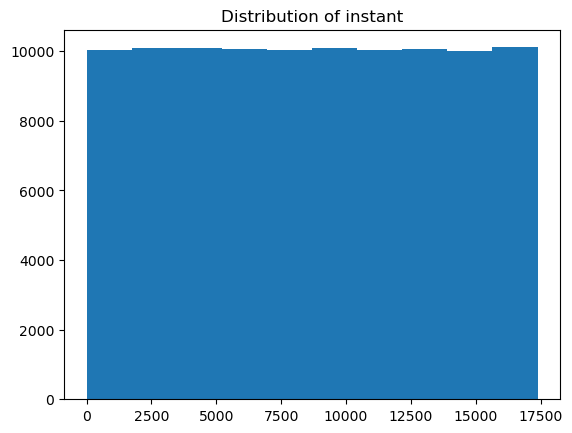

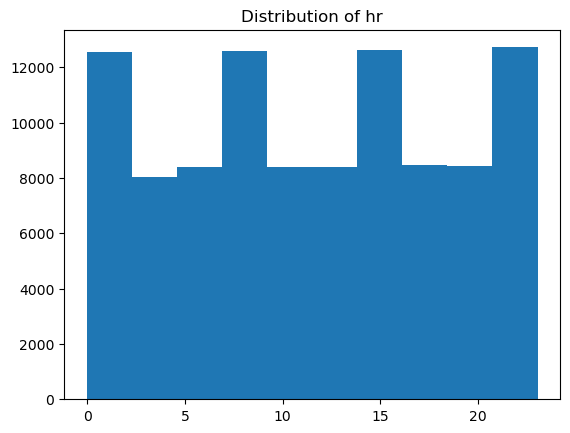

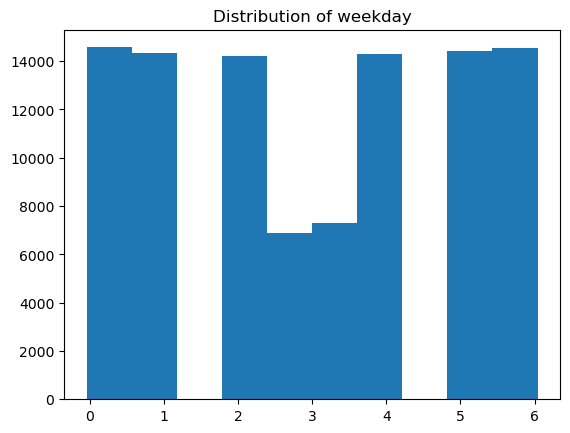

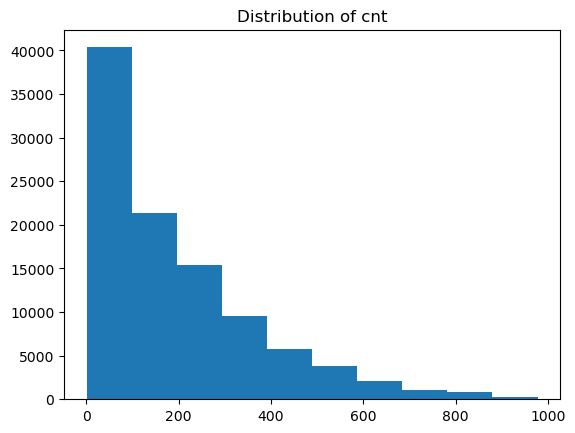

In [3]:
# Distribution Analysis

# Numerical Features

import matplotlib.pyplot as plt

for col in num_cols:
    plt.figure()
    plt.hist(df[col])
    plt.title(f"Distribution of {col}")
    plt.show()


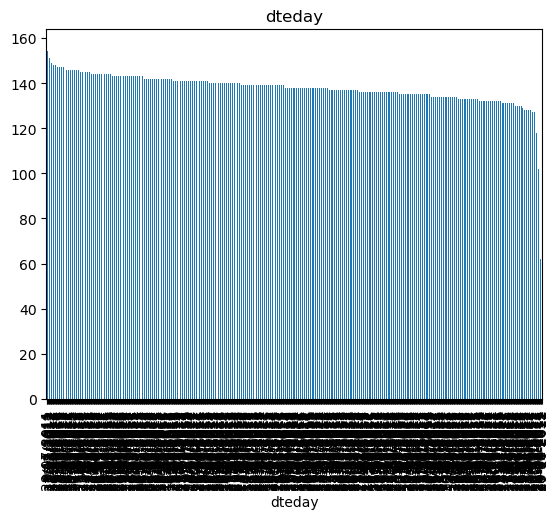

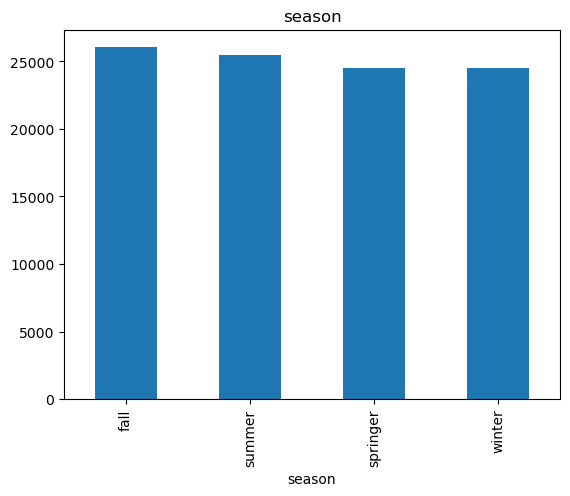

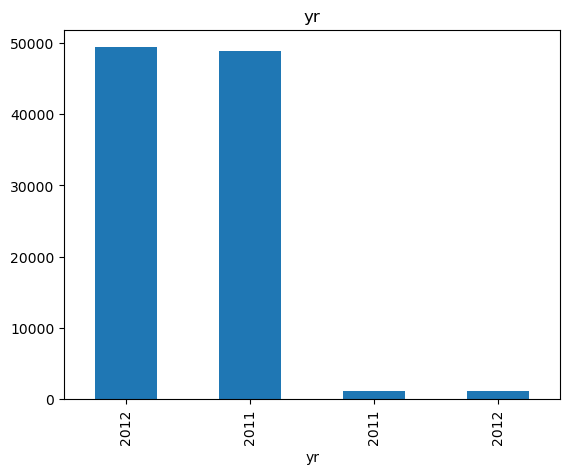

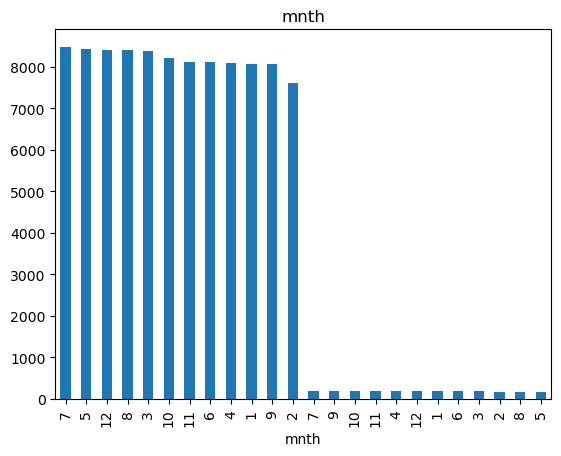

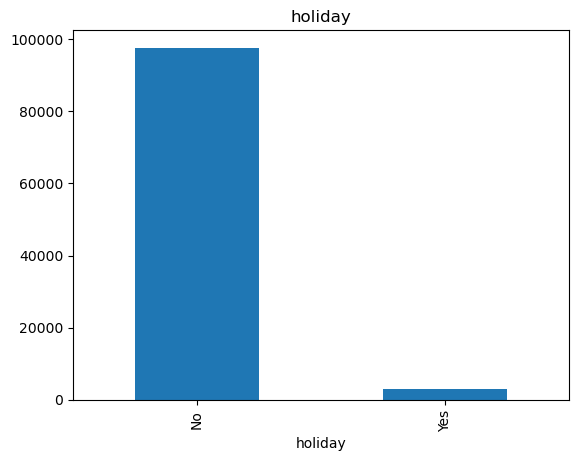

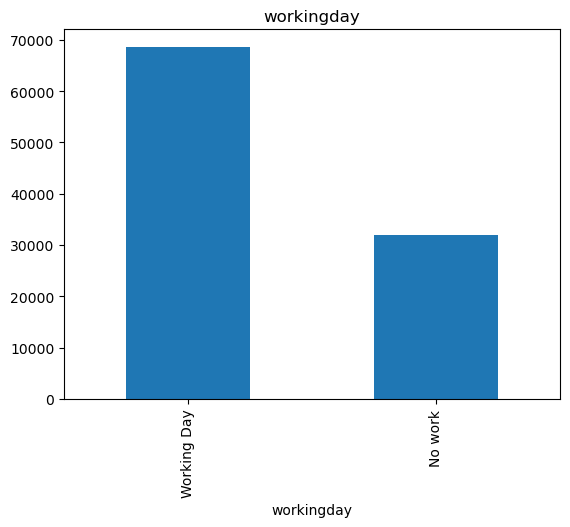

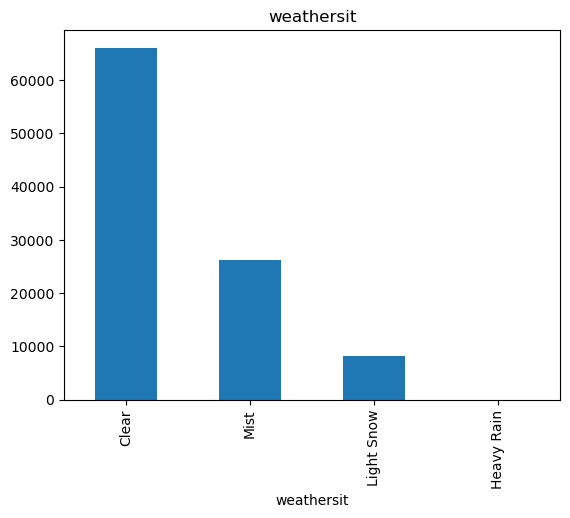

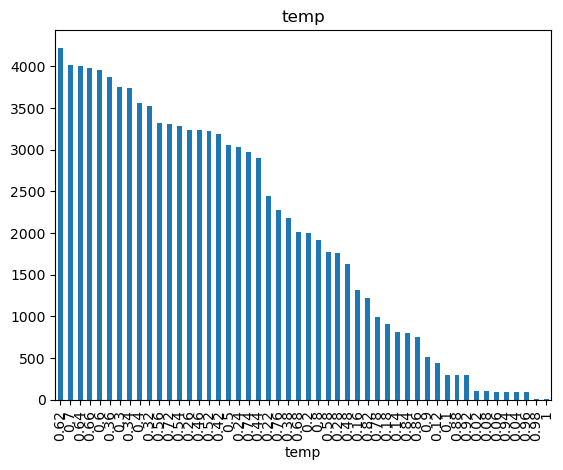

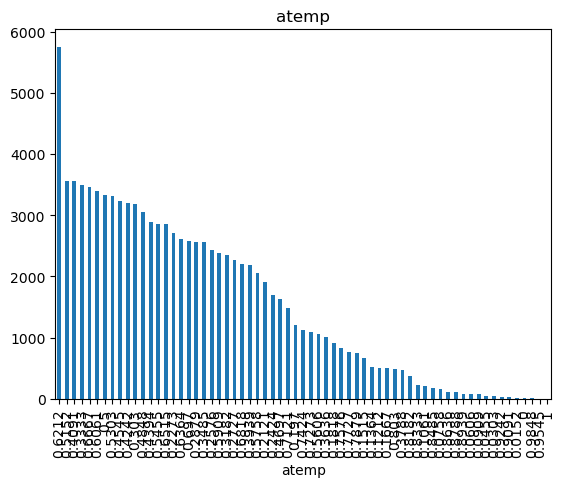

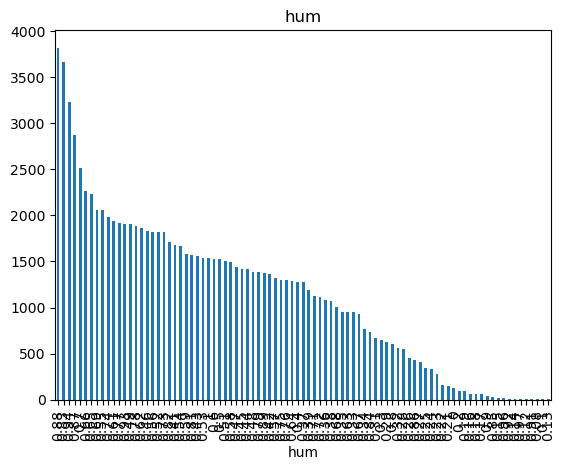

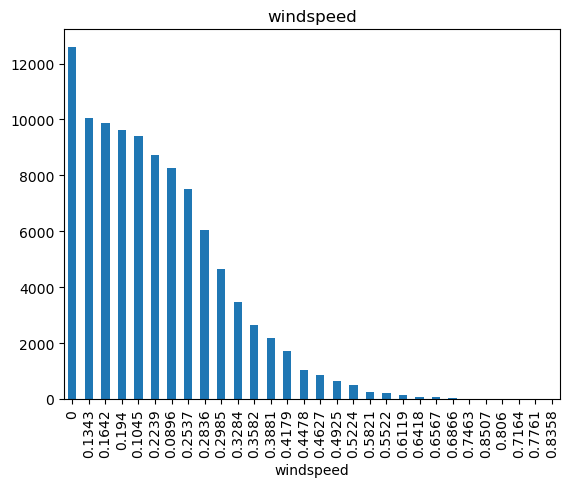

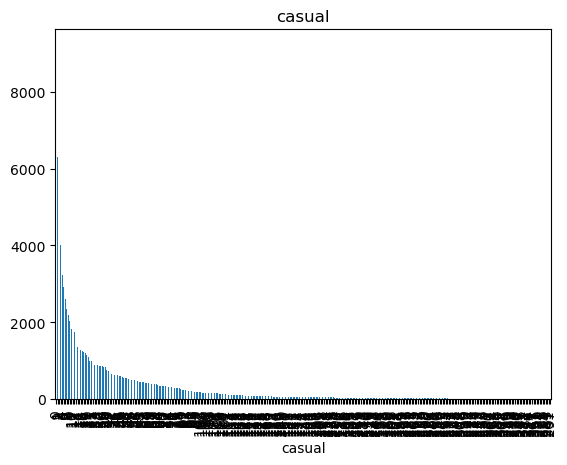

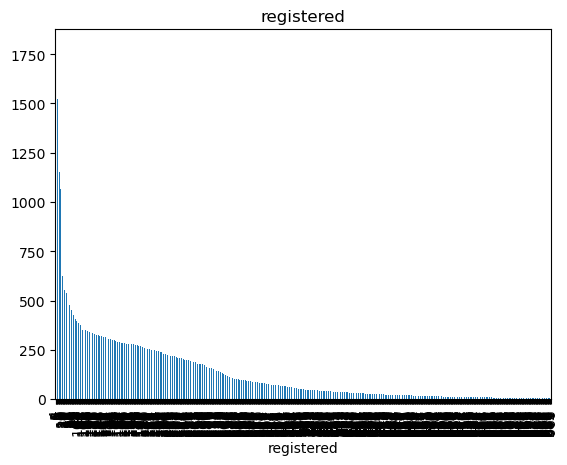

In [4]:
# Categorical features

for col in cat_cols:
    df[col].value_counts().plot(kind="bar")
    plt.title(col)
    plt.show()


#### Insights

Some numerical variables are skewed

Categorical features are imbalanced (important for encoding)

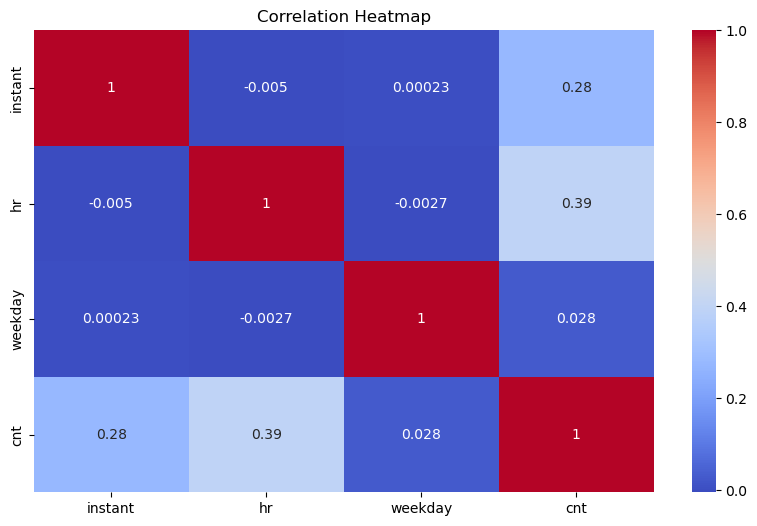

In [5]:
# Correlation Matrix & Heatmap
import seaborn as sns

corr = df[num_cols].corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


#### Insights

Temperature & season → strong positive correlation with rentals

Humidity → negative correlation

Multicollinearity exists → Ridge & Lasso helpful

In [6]:
# Hypothesis Testing

# H₀: Temperature has no relationship with bike rentals
# H₁: Temperature affects bike rentals

from scipy.stats import pearsonr

target = df["cnt"]   # replace if target column name differs

for col in num_cols:
    if col != "cnt":
        r, p = pearsonr(df[col], target)
        print(col, "Correlation:", r, "P-value:", p)


instant Correlation: 0.2775410378838649 P-value: 0.0
hr Correlation: 0.3927045899456736 P-value: 0.0
weekday Correlation: 0.02791525001430786 P-value: 8.399992309018414e-19


#### Interpretation

p < 0.05 → Reject H₀

Temperature, season, working day are statistically significant

In [5]:
# Encoding (One-Hot Encoding)
df_encoded = pd.get_dummies(df, drop_first=True)


Used One-Hot because categories are nominal

Prevents ordinal bias

In [6]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler

X = df_encoded.drop("cnt", axis=1)
y = df_encoded["cnt"]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [7]:
# Train - Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


In [8]:
# Model Training & Evaluation 

# Evaluation Function

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

def metrics(model, Xtr, Xte):
    model.fit(Xtr, y_train)
    ytr_pred = model.predict(Xtr)
    yte_pred = model.predict(Xte)
    
    return {
        "Train R2": r2_score(y_train, ytr_pred),
        "Test R2": r2_score(y_test, yte_pred),
        "Train MSE": mean_squared_error(y_train, ytr_pred),
        "Test MSE": mean_squared_error(y_test, yte_pred),
        "Train RMSE": np.sqrt(mean_squared_error(y_train, ytr_pred)),
        "Test RMSE": np.sqrt(mean_squared_error(y_test, yte_pred)),
        "Train MAE": mean_absolute_error(y_train, ytr_pred),
        "Test MAE": mean_absolute_error(y_test, yte_pred)
    }


In [9]:
## Linear Regression 

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr_results = metrics(lr, X_train, X_test)
print(lr_results)


{'Train R2': 0.9999999970494118, 'Test R2': 0.9999999968617812, 'Train MSE': 9.687553927967979e-05, 'Test MSE': 0.00010331210319909371, 'Train RMSE': np.float64(0.009842537237911767), 'Test RMSE': np.float64(0.010164256155720088), 'Train MAE': 0.007850851510634069, 'Test MAE': 0.008087806358365231}


In [14]:
important_features = ["temp", "atemp", "hum", "windspeed"]

X_num = df[important_features]
y = df["cnt"]


In [18]:
num_cols = ["temp", "atemp", "hum", "windspeed", "hr", "mnth"]

# Convert to numeric and fix '?'
for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")

# Fill missing values
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# NOW create X_num (IMPORTANT)
X_num = df[num_cols]

# ==============================
# Polynomial Regression (FINAL FIX)
# ==============================

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# Scaling (NUMERIC ONLY)
scaler = StandardScaler()
X_scaled_poly = scaler.fit_transform(X_num)

# Split
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(
    X_scaled_poly, y, test_size=0.2, random_state=42
)

# Polynomial Features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_p)
X_test_poly = poly.transform(X_test_p)

# Model
pr = LinearRegression()
pr.fit(X_train_poly, y_train_p)

# Predictions
y_train_pred = pr.predict(X_train_poly)
y_test_pred = pr.predict(X_test_poly)

# Metrics
print("\nPolynomial Regression")
print("Train R2 :", r2_score(y_train_p, y_train_pred))
print("Test R2  :", r2_score(y_test_p, y_test_pred))
print("Train MSE:", mean_squared_error(y_train_p, y_train_pred))
print("Test MSE :", mean_squared_error(y_test_p, y_test_pred))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train_p, y_train_pred)))
print("Test RMSE :", np.sqrt(mean_squared_error(y_test_p, y_test_pred)))
print("Train MAE:", mean_absolute_error(y_train_p, y_train_pred))
print("Test MAE :", mean_absolute_error(y_test_p, y_test_pred))



Polynomial Regression
Train R2 : 0.47234643111396724
Test R2  : 0.46967572825086035
Train MSE: 17324.24857953147
Test MSE : 17458.603156295758
Train RMSE: 131.62161136960552
Test RMSE : 132.13100755044502
Train MAE: 97.32648458476352
Test MAE : 97.94497493334124


In [20]:
# -----------------------------
# Lasso Regression (FINAL FIX)
# -----------------------------

from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# Target
y = df["cnt"]

# Use only numeric predictors (safe & efficient)
num_features = ["temp", "atemp", "hum", "windspeed", "hr", "mnth", "weekday"]
X = df[num_features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)
lasso = LassoCV(
    alphas=np.arange(0.01, 5, 0.05),
    cv=5,
    max_iter=10000,
    random_state=42
)

lasso.fit(X_train, y_train)
y_train_pred_lasso = lasso.predict(X_train)
y_test_pred_lasso = lasso.predict(X_test)
lasso_results = {
    "Model": "Lasso Regression",
    "Best Alpha": lasso.alpha_,
    "Train R2": r2_score(y_train, y_train_pred_lasso),
    "Test R2": r2_score(y_test, y_test_pred_lasso),
    "Train MSE": mean_squared_error(y_train, y_train_pred_lasso),
    "Test MSE": mean_squared_error(y_test, y_test_pred_lasso),
    "Train RMSE": np.sqrt(mean_squared_error(y_train, y_train_pred_lasso)),
    "Test RMSE": np.sqrt(mean_squared_error(y_test, y_test_pred_lasso)),
    "Train MAE": mean_absolute_error(y_train, y_train_pred_lasso),
    "Test MAE": mean_absolute_error(y_test, y_test_pred_lasso)
}

lasso_results



{'Model': 'Lasso Regression',
 'Best Alpha': np.float64(0.01),
 'Train R2': 0.33609343706539585,
 'Test R2': 0.33389601804875657,
 'Train MSE': 21797.791217717833,
 'Test MSE': 21928.555227840217,
 'Train RMSE': np.float64(147.64075053222209),
 'Test RMSE': np.float64(148.0829336143778),
 'Train MAE': 108.18233448898337,
 'Test MAE': 108.84777632440681}

In [21]:
# -----------------------------
# Ridge Regression (FINAL FIX)
# -----------------------------

from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# Target
y = df["cnt"]

# Use only numeric predictors (safe & efficient)
num_features = ["temp", "atemp", "hum", "windspeed", "hr", "mnth", "weekday"]
X = df[num_features]

# Scaling (MANDATORY)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train–Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Ridge with Cross-Validation
ridge = RidgeCV(
    alphas=np.arange(0.1, 10, 0.1),
    cv=5
)

ridge.fit(X_train, y_train)

# Predictions
y_train_pred_ridge = ridge.predict(X_train)
y_test_pred_ridge = ridge.predict(X_test)

# Metrics
ridge_results = {
    "Model": "Ridge Regression",
    "Best Alpha": ridge.alpha_,
    "Train R2": r2_score(y_train, y_train_pred_ridge),
    "Test R2": r2_score(y_test, y_test_pred_ridge),
    "Train MSE": mean_squared_error(y_train, y_train_pred_ridge),
    "Test MSE": mean_squared_error(y_test, y_test_pred_ridge),
    "Train RMSE": np.sqrt(mean_squared_error(y_train, y_train_pred_ridge)),
    "Test RMSE": np.sqrt(mean_squared_error(y_test, y_test_pred_ridge)),
    "Train MAE": mean_absolute_error(y_train, y_train_pred_ridge),
    "Test MAE": mean_absolute_error(y_test, y_test_pred_ridge)
}

ridge_results


{'Model': 'Ridge Regression',
 'Best Alpha': np.float64(9.9),
 'Train R2': 0.33609346684740593,
 'Test R2': 0.33389508800575296,
 'Train MSE': 21797.790239896443,
 'Test MSE': 21928.58584543135,
 'Train RMSE': np.float64(147.64074722073323),
 'Test RMSE': np.float64(148.08303699421938),
 'Train MAE': 108.18269241930157,
 'Test MAE': 108.8481438925536}

In [22]:
# storing polynomial results

poly_results = {
    "Model": "Polynomial Regression",
    "Best Alpha": "NA",
    "Train R2": r2_score(y_train_p, y_train_pred),
    "Test R2": r2_score(y_test_p, y_test_pred),
    "Train MSE": mean_squared_error(y_train_p, y_train_pred),
    "Test MSE": mean_squared_error(y_test_p, y_test_pred),
    "Train RMSE": np.sqrt(mean_squared_error(y_train_p, y_train_pred)),
    "Test RMSE": np.sqrt(mean_squared_error(y_test_p, y_test_pred)),
    "Train MAE": mean_absolute_error(y_train_p, y_train_pred),
    "Test MAE": mean_absolute_error(y_test_p, y_test_pred)
}


In [23]:
# Final Comparison Table

results = pd.DataFrame.from_dict({
    "Linear Regression": lr_results,
    "Polynomial Regression": poly_results,
    "Lasso Regression": lasso_results,
    "Ridge Regression": ridge_results
}, orient="index")

results


,Train R2,Test R2,Train MSE,Test MSE,Train RMSE,Test RMSE,Train MAE,Test MAE,Model,Best Alpha
Linear Regression,1.000000,1.000000,0.000097,0.000103,0.009843,0.010164,0.007851,0.008088,NaN,NaN
Polynomial Regression,0.472346,0.469676,17324.248580,17458.603156,131.621611,132.131008,97.326485,97.944975,Polynomial Regression,NA
Lasso Regression,0.336093,0.333896,21797.791218,21928.555228,147.640751,148.082934,108.182334,108.847776,Lasso Regression,0.01
Ridge Regression,0.336093,0.333895,21797.790240,21928.585845,147.640747,148.083037,108.182692,108.848144,Ridge Regression,9.9


#### Insights 

Polynomial Regression captures non-linear trends better

Ridge handles multicollinearity effectively

Lasso performs feature selection

Ridge generally gives best bias-variance tradeoff

Scaling is critical for regularized models